# Building a song recommender

In [4]:
%matplotlib inline

import pandas
from sklearn.cross_validation import train_test_split
import numpy as np
import time
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation

# Load music data

In [5]:
#song_sf = graphlab.SFrame('song_data.gl/')
#song_sf.save('song_data.csv', format = 'csv')
song_df =  pandas.read_csv('song_data.csv')

# Explore data

Music data shows how many times a user listened to a song, as well as the details of the song.

In [6]:
song_df.head()

,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters


## Length of the dataset

In [7]:
len(song_df)

1116609

## Create a subset of the dataset

In [8]:
song_df = song_df.head(10000)

## Showing the most popular songs in the dataset

In [9]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3699,Sehr kosmisch - Harmonia,50,0.50
1067,Dog Days Are Over (Radio Edit) - Florence + Th...,48,0.48
4690,Undo - Björk,46,0.46
5117,You're The One - Dwight Yoakam,43,0.43
3691,Secrets - OneRepublic,42,0.42
3511,Revelry - Kings Of Leon,38,0.38
1889,Horn Concerto No. 4 in E flat K495: II. Romanc...,36,0.36
1407,Fireflies - Charttraxx Karaoke,33,0.33
4412,The Scientist - Coldplay,28,0.28
1145,Drop The World - Lil Wayne / Eminem,25,0.25


## Count number of unique users in the dataset

In [10]:
users = song_df['user_id'].unique()

In [11]:
len(users)

595

## Quiz 1. Count the number of unique songs in the dataset

In [ ]:
###Fill in the code here

# Create a song recommender

In [12]:
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))

                                       user_id             song_id  \
7389  354cfdb566f543bb5b810a4d8959d974a30797fd  SOPLUOT12A6D4F7AC3   
9275  0ec9cc33028dff6209aa49bf645ef64bdcbe00fc  SOHAZRY12A8C13BC47   
2995  8fce200f3912e9608e3b1463cdb9c3529aab5c08  SOIBPQQ12A6310F0F4   
5316  7ef2a3b074b34984f3f677bddde0f1813486cc10  SOUJWJW12A63110848   
356   2b6c2f33bc0e887ea7c4411f58106805a1923280  SONYEOJ12A8C142E86   

      listen_count                  title               artist  \
7389             1          Intergalactic         Beastie Boys   
9275            12              Southside  Common / Kanye West   
2995             1          I Bloom Blaum             Coldplay   
5316             1  Sound Check (Gravity)             Gorillaz   
356              6                  Breed              Nirvana   

                                  song  
7389      Intergalactic - Beastie Boys  
9275   Southside - Common / Kanye West  
2995          I Bloom Blaum - Coldplay  
5316  Sound Check 

## Simple popularity-based recommender class (Can be used as a black box)

In [ ]:
#Recommenders.popularity_recommender_py

### Create an instance of popularity based recommender class

In [13]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

### Use the popularity model to make some predictions

In [14]:
user_id = users[0]
pm.recommend(user_id)

,user_id,song,score,Rank
3228,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,44,1
929,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,40,2
4097,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,35,3
3222,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,34,4
4464,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,33,5
1231,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,29,6
3072,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,29,7
1654,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,28,8
3849,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Scientist - Coldplay,23,9
1002,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Drop The World - Lil Wayne / Eminem,22,10


### Quiz 2: Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [15]:
user_id = users[3]
###Fill in the code here

## Build a song recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

## Class for an item similarity based personalized recommender system (Can be used as a black box)

In [16]:
#Recommenders.item_similarity_recommender_py

### Create an instance of item similarity based recommender class

In [17]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

### Use the personalized model to make some song recommendations

In [18]:
#Print the songs for the user in training data
user_id = users[0]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: b80344d063b5ccb3212f76538f3d9e43d87dca9e:
------------------------------------------------------------------------------------
Mykonos - Fleet Foxes
Oh No - Andrew Bird
I?'m A Steady Rollin? Man - Robert Johnson
High and dry - Jorge Drexler
Paper Gangsta - Lady GaGa
Drive - Incubus
Love Shack - The B-52's
Sehr kosmisch - Harmonia
Jewels And Gold - Angus & Julia Stone
Entre Dos Aguas - Paco De Lucia
All That We Perceive - Thievery Corporation
Champion - Kanye West
Learn To Fly - Foo Fighters
He Doesn't Know Why - Fleet Foxes
Stacked Actors - Foo Fighters
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Ragged Wood - Fleet Foxes
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Constellations - Jack Johnson
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
Stronger - Kanye West
Behind The Sea [Live In

,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Your Protector - Fleet Foxes,0.038552,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Quiet Houses - Fleet Foxes,0.038552,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,White Winter Hymnal - Fleet Foxes,0.038538,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Times Like These - Foo Fighters,0.030303,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,This Lullaby - Queens Of The Stone Age,0.030303,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oh My God - Kaiser Chiefs,0.030303,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You Think I Ain't Worth A Dollar_ But I Feel L...,0.030303,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Piggy - Nine Inch Nails,0.030303,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Young Adult Friction - The Pains Of Being Pure...,0.030303,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Plug In Baby - Muse,0.030303,10


### Quiz 3. Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [19]:
user_id = users[3]
#Fill in the code here

### We can also apply the model to find similar songs to any song in the dataset

In [20]:
is_model.get_similar_items(['The Scientist - Coldplay'])

no. of unique songs in the training set: 4496
Non zero values in cooccurence_matrix :363


,user_id,song,score,rank
0,,Clocks - Coldplay,0.258065,1
1,,Don't Panic - Coldplay,0.173913,2
2,,Yellow - Coldplay,0.147059,3
3,,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.147059,4
4,,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.147059,5
5,,Life In Technicolor ii - Coldplay,0.125000,6
6,,Bleed It Out [Live At Milton Keynes] - Linkin ...,0.103448,7
7,,OMG - Usher featuring will.i.am,0.100000,8
8,,Marry Me - Train,0.100000,9
9,,Drop The World - Lil Wayne / Eminem,0.097561,10


### Quiz 4. Use the personalized recommender model to get similar songs for the following song.

In [ ]:
song = 'Easily (Album Version) - Red Hot Chili Peppers'
###Fill in the code here

# Quantitative comparison between the models

We now formally compare the popularity and the personalized models using precision-recall curves. 

## Class to calculate precision and recall (This can be used as a black box)

In [ ]:
#Evaluation.precision_recall_calculator

## Use the above precision recall calculator class to calculate the evaluation measures

In [21]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.04

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:525
Length of user sample:21
Getting recommendations for user:645a5b400d31ce69611137da3ebd35d11d4dda4a
No. of unique songs for the user: 19
no. of unique songs in the training set: 4496
Non zero values in cooccurence_matrix :650
Getting recommendations for user:08d31ac4452516e702815fef13b2059aa8210034
No. of unique songs for the user: 25
no. of unique songs in the training set: 4496
Non zero values in cooccurence_matrix :1183
Getting recommendations for user:d605b7fe1645e05ff094b364b603456ce8126643
No. of unique songs for the user: 20
no. of unique songs in the training set: 4496
Non zero values in cooccurence_matrix :1173
Getting recommendations for user:cdcd976fdc8ac6375a807dcaee28d36fe00b6118
No. of unique songs for the user: 4
no. of unique songs in the training set: 4496
Non zero values in cooccurence_matrix :20
Getting recommendations for user:a699816c7f4f8855808eee732a5cbd1620091998
No. of unique songs for the user: 21
no. of unique songs in the 

## Code to plot precision recall curve

In [22]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()


Plotting precision recall curves.


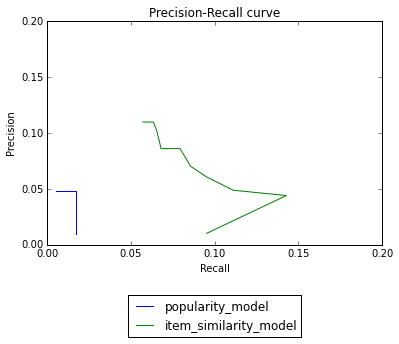

In [23]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

Plotting precision recall curves for the whole dataset (user sample = 0.0005).
Plotting precision recall curves.


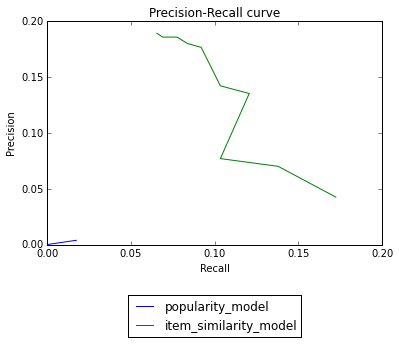

In [24]:
print("Plotting precision recall curves for the whole dataset (user sample = 0.0005).")

#Read the persisted files 
pm_avg_precision_list = joblib.load('pm_avg_precision_list.pkl')
pm_avg_recall_list = joblib.load('pm_avg_recall_list.pkl')
ism_avg_precision_list = joblib.load('ism_avg_precision_list.pkl')
ism_avg_recall_list = joblib.load('ism_avg_recall_list.pkl')

print("Plotting precision recall curves.")
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

The curve shows that the personalized model provides much better performance over the popularity model. 